In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [3]:
np.random.seed(10)
age=np.random.randint(20,100,20)

In [4]:
np.random.seed(10)
salary=np.random.randint(15000,70000,20)

In [5]:
df=pd.DataFrame(columns=["age","salary"])

In [6]:
df["age"]=age
df["salary"]=salary

In [7]:
df

,age,salary
0,29,32673
1,35,55061
2,84,44199
3,48,65496
4,49,43017
5,28,55059
6,93,24372
7,20,25201
8,60,52597
9,56,32904


In [10]:
df["insurance_bought"]=df["age"].apply(lambda x:1 if (x>=20) and (x<=40) else 0)
df["insurance_bought"]

0     1
1     1
2     0
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    1
11    1
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: insurance_bought, dtype: int64

<AxesSubplot:xlabel='age', ylabel='salary'>

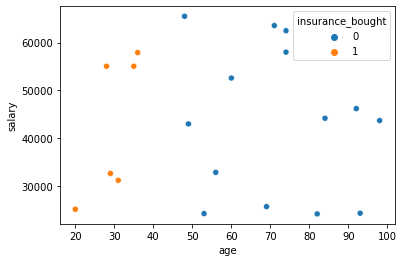

In [13]:
sns.scatterplot(x="age",y="salary",hue="insurance_bought",data=df)

In [9]:
df[df["age"]==31]

,age,salary,insurance_bought
11,31,31241,1


In [10]:
df[df["age"]==71]

,age,salary,insurance_bought
18,71,63548,0


In [11]:
df.loc[11,["insurance_bought"]]=0
df.loc[18,["insurance_bought"]]=1

In [12]:
df

,age,salary,insurance_bought
0,29,32673,1
1,35,55061,1
2,84,44199,0
3,48,65496,0
4,49,43017,0
5,28,55059,1
6,93,24372,0
7,20,25201,1
8,60,52597,0
9,56,32904,0


<AxesSubplot:xlabel='age', ylabel='salary'>

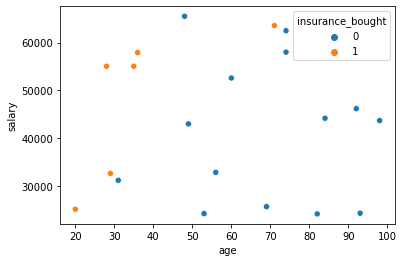

In [13]:
sns.scatterplot(x="age",y="salary",hue="insurance_bought",data=df)

In [14]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [15]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.15,random_state=42)

In [17]:
knn=KNeighborsClassifier()

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
# evulate

In [20]:
y_pred=knn.predict(x_test)

In [21]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [22]:
y_pred_train=knn.predict(x_train)

In [23]:
accuracy_score(y_train,y_pred_train)

0.8235294117647058

In [25]:
knn.predict([[0.49,1.36]])

array([0], dtype=int64)

In [26]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)


0.6666666666666666

In [27]:
y_pred_train=knn.predict(x_train)
accuracy_score(y_train,y_pred_train)

1.0

In [28]:
knn.predict([[71,63547]])

array([0], dtype=int64)

In [29]:
#z=x-mean/std

In [30]:
print(df["age"].mean())
print(df["age"].std())

59.1
24.22677944146236


In [31]:
(71-59.1)/24.22

0.4913294797687861

In [32]:
print(df["salary"].mean())

43396.55


In [33]:
df["salary"].std()

14793.549463675394

In [34]:
(63547-34396)/14793.54

1.9705222685036845

In [35]:
knn.predict([[0.49,1.36]])

array([1], dtype=int64)

In [36]:
l=[1,3,5,7,9,11,13,15,17]
acc_test=[]
acc_train=[]
for i in l:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    ac_t=accuracy_score(y_test,y_pred)
    acc_test.append(ac_t)
    y_pred_train=knn.predict(x_train)
    ac_tr=accuracy_score(y_train,y_pred_train)
    acc_train.append(ac_tr)
    

In [37]:
print("accuracy on train",acc_train)

accuracy on train [1.0, 0.8235294117647058, 0.8235294117647058, 0.7647058823529411, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765]


In [38]:
print("accuracy on train",acc_test)

accuracy on train [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666]


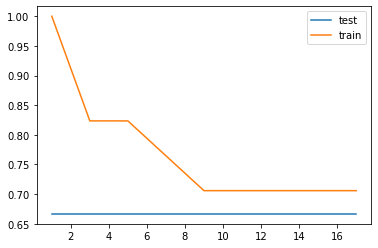

In [39]:
plt.plot(l,acc_test,label="test")
plt.plot(l,acc_train,label="train")
plt.legend()